# Data Analysis
## 2. Load the dataset.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Housing.csv')

## 4. Perform descriptive statistics on the dataset.


In [87]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 5. Handle the Missing values.


In [88]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


## 6. Find the outliers and replace the outliers


In [89]:
num_df = df[['price','area']]

num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
90%,7.350000e+06,7980.000000
95%,8.400000e+06,9000.000000
99%,1.054200e+07,12543.600000


In [90]:
# The jump at 99 percentile shows outliners in fare feature
q = df["area"].quantile(0.99)
df = df[df['area'] < q]
df['area'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count      539.000000
mean      5051.949907
std       1963.928396
min       1650.000000
25%       3577.000000
50%       4510.000000
75%       6360.000000
90%       7714.000000
95%       8807.500000
99%      10624.000000
max      12090.000000
Name: area, dtype: float64

In [91]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## 7. Check for Categorical columns and perform encoding.


In [92]:
dic={'yes': 1 , 'no': 0}
df['mainroad'] = df['mainroad'].map(dic)
df['guestroom'] = df['guestroom'].map(dic)
df['basement'] = df['basement'].map(dic)
df['hotwaterheating'] = df['hotwaterheating'].map(dic)
df['airconditioning'] = df['airconditioning'].map(dic)

furnishingdic = {"furnished":2, "semi-furnished":1,"unfurnished":0}
df["furnishingstatus"] = df["furnishingstatus"].map(furnishingdic)

## 3. Perform Below Visualizations.
### Univariate Analysis


In [93]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,2


price


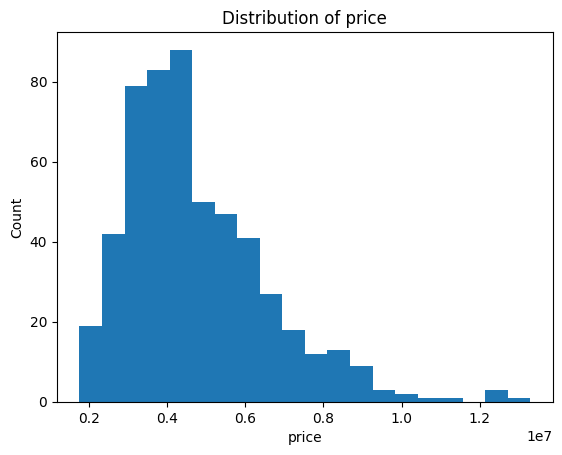

area


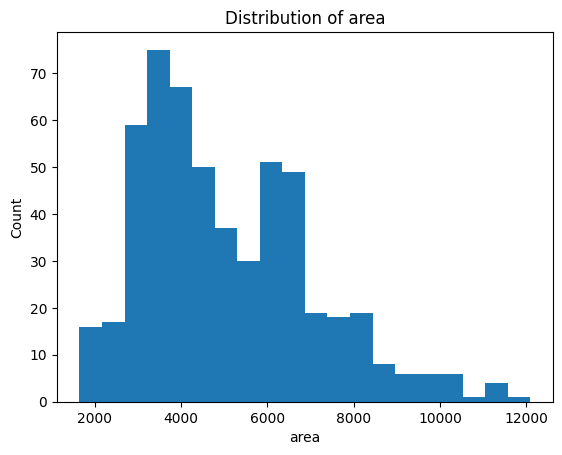

bedrooms


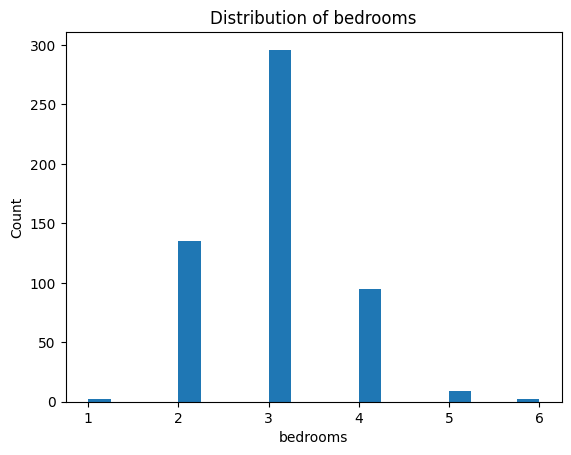

bathrooms


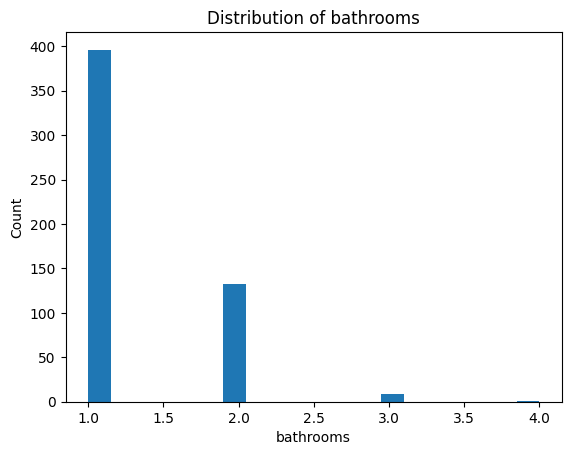

stories


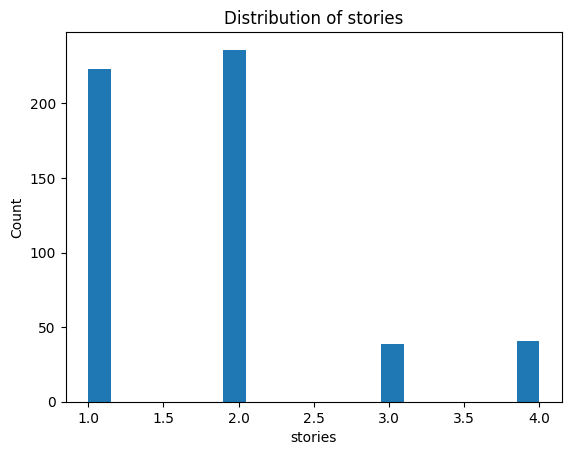

mainroad


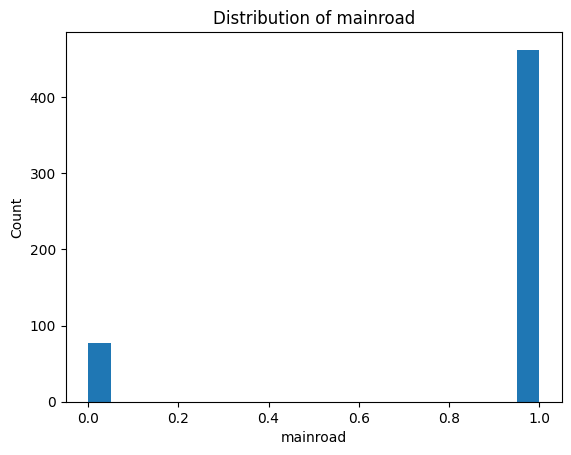

guestroom


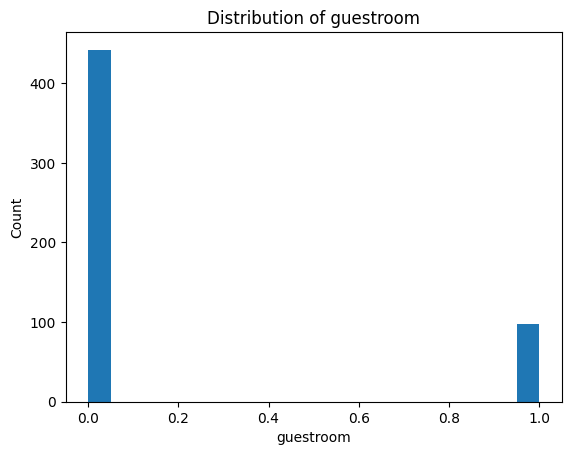

basement


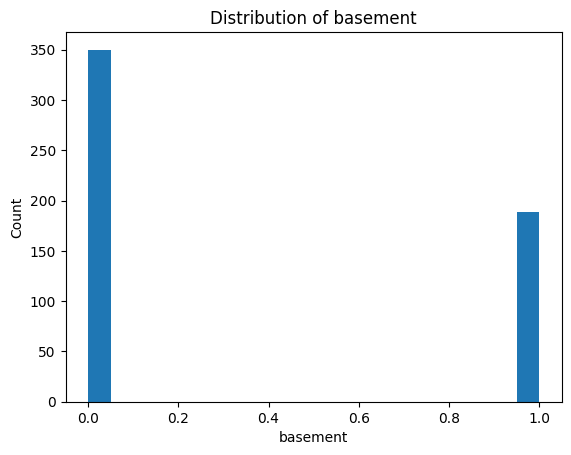

hotwaterheating


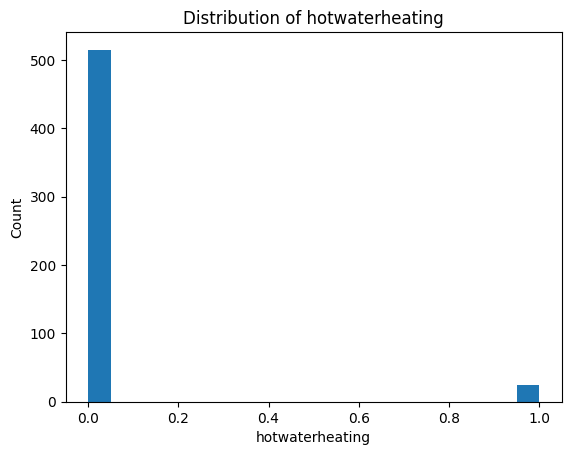

airconditioning


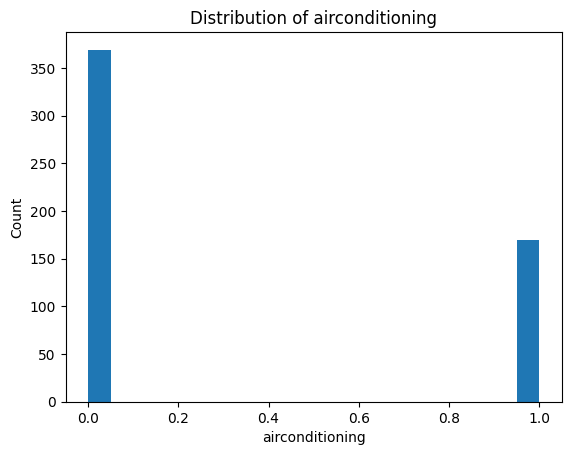

parking


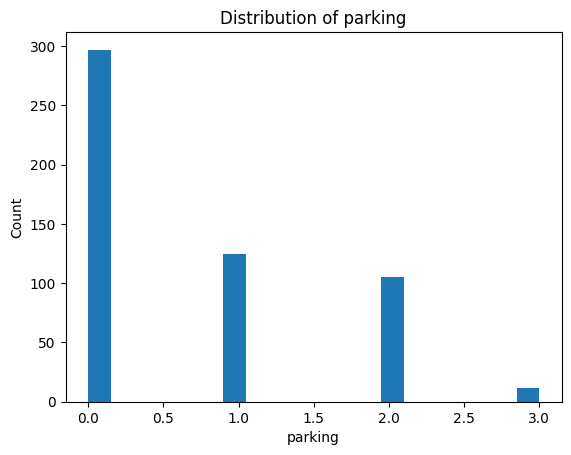

furnishingstatus


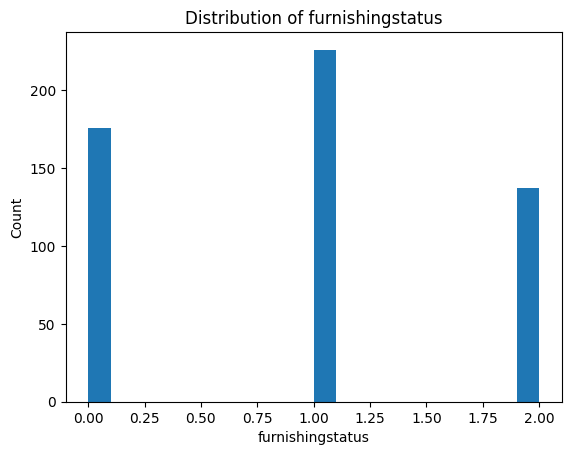

In [94]:
for i in df.columns:
    print(i)
    plt.hist(df[str(i)].dropna(), bins=20)
    plt.xlabel(str(i))
    plt.ylabel('Count')
    plt.title(f'Distribution of {str(i)}')
    plt.show()

### Bi - Variate Analysis


<AxesSubplot:xlabel='area', ylabel='price'>

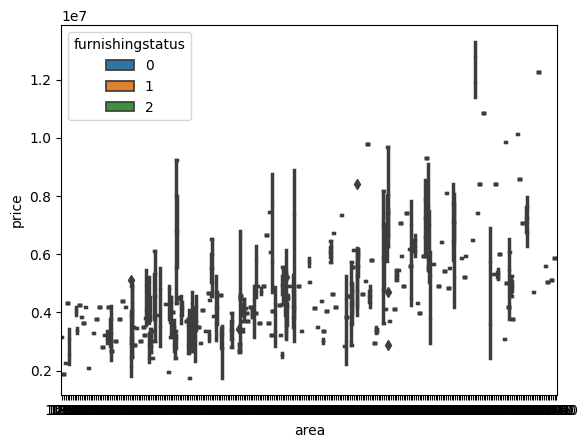

In [95]:
sns.boxplot(x="area", y="price", hue="furnishingstatus",data=df, linewidth=2.5)

### Multi - Variate Analysis


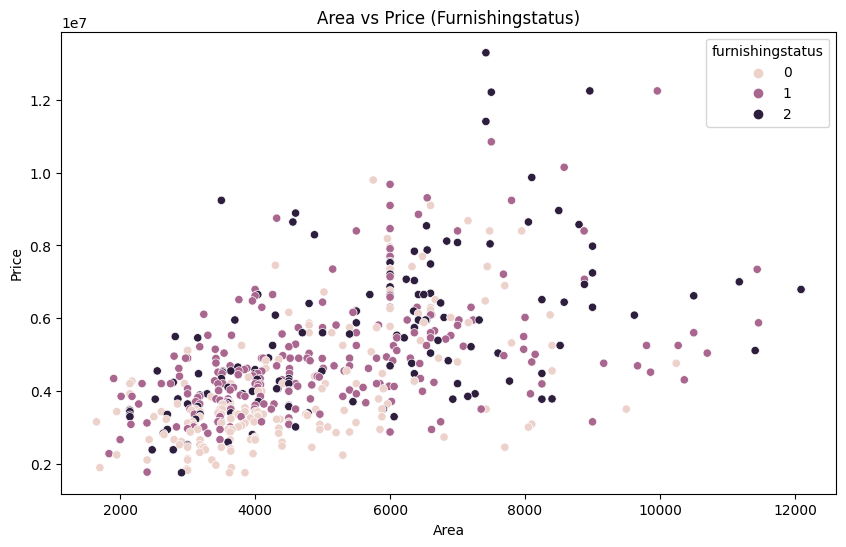

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=df)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (Furnishingstatus)')
plt.show()

## 8. Split the data into dependent and independent variables.


In [97]:
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable
X.drop('basement', axis=1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,1,2,2
1,8960,4,4,4,1,0,0,1,3,2
2,9960,3,2,2,1,0,0,0,2,1
3,7500,4,2,2,1,0,0,1,3,2
4,7420,4,1,2,1,1,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,0,0,2,0
541,2400,3,1,1,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,2


## 9. Scale the independent variables


In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 10. Split the data into training and testing


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 11. Build the Model

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 12. Train the Model

In [101]:
model.fit(X_train, y_train)

LinearRegression()

## 13. Test the Model

In [102]:
y_pred = model.predict(X_test)

## 14. Measure the performance using Metrics.

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1698229274743.3909
Mean Absolute Error: 888524.2757822749
R-squared: 0.6448912872076074
